# Topic Modeling of Hiking Trail Reviews

This notebook is for cleaning the scraped trail review data and trying a few different methods for topic modeling of the free text.  Ideally, we will be able to associate words with certain topics relevant to people evaluating new trails, such as trail conditions, road conditions, and wildlife, so that we can return relevant text from trail reviews during the search process.  

### First we will try LDA on the shoes and see what clusters it comes up with.  See https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

In [1]:
import pandas as pd
peoplereports = pd.read_csv('peoplereviews3.csv', header = None)
column_names = ['tripreporturl', 'hikename', 'hikeurl', 'report', 'date', 'conditions', 'features', 'thumbs']
peoplereports.columns = column_names
prep = peoplereports
prep['goodcond'] = prep.conditions.str.contains('Trail in good condition')
prep['diffnav'] = prep.conditions.str.contains('navigate')
prep['mjrobs'] = prep.conditions.str.contains('Obstacles on trail')
prep['minobs'] = prep.conditions.str.contains('Minor obstacles')
prep['hikename'] = prep['hikename'].str[:-32]
prep.head()

,tripreporturl,hikename,hikeurl,report,date,conditions,features,thumbs,goodcond,diffnav,mjrobs,minobs
0,https://www.wta.org/go-hiking/trip-reports/tri...,McClellan Butte,https://www.wta.org/go-hiking/hikes/mcclellan-...,\nQuick run up the Butte with beautiful fall w...,Sep 19 2018,Type of HikeDay hikeTrail ConditionsTrail in g...,"<div id=""trip-features"">\n<div class=""feature ...",5,True,False,False,False
1,https://www.wta.org/go-hiking/trip-reports/tri...,"Nooksack Cirque, Hannegan Pass and Peak, Goat ...",https://www.wta.org/go-hiking/hikes/nooksack-c...,\nHannegan Pass Road is closed from 9/18-9/20 ...,Sep 19 2018,Type of HikeDay hikeTrail ConditionsTrail in g...,"<div id=""trip-features"">\n</div>",3,True,False,False,False
2,https://www.wta.org/go-hiking/trip-reports/tri...,Annette Lake,https://www.wta.org/go-hiking/hikes/annette-lake,\nMy dog Dusty and I reached the Annette Lake ...,Sep 19 2018,Type of HikeDay hikeTrail ConditionsTrail in g...,"<div id=""trip-features"">\n<div class=""feature ...",3,True,False,False,False
3,https://www.wta.org/go-hiking/trip-reports/tri...,Anti-Aircraft Peak,https://www.wta.org/go-hiking/hikes/anti-aircr...,\nDidn't want to drive too far so did this hik...,Sep 19 2018,Type of HikeDay hikeTrail ConditionsTrail in g...,"<div id=""trip-features"">\n</div>",1,True,False,False,False
4,https://www.wta.org/go-hiking/trip-reports/tri...,Tahoma Creek Suspension Bridge - Emerald Ridge...,https://www.wta.org/go-hiking/hikes/emerald-ridge,\nWe chose to do the unmaintained Tahoma Creek...,Sep 19 2018,Type of HikeDay hikeTrail ConditionsTrail diff...,"<div id=""trip-features"">\n</div>",10,False,True,False,False


In [4]:
oldreports = pd.read_csv('dfgrouped.csv', header = None)
oldreports.head()

,0,1,2,3
0,NaN,hikename,report,index
1,0.0,Aasgard Pass — Washington Trails Association,\nFinally the day came when I decided to pull ...,0
2,1.0,Alger Alp (South Route) — Washington Trails As...,\nNot suitable for dogs over the age of 10. I ...,1
3,2.0,Alta Mountain — Washington Trails Association,\nHike before Rachel lake is steep for one mil...,2
4,3.0,Ancient Lakes — Washington Trails Association,\nWork obligations kept me in town for most of...,3


In [2]:
prep['paragraph'] = prep.report.apply(lambda x: x[1:-1].split('\n'))

In [15]:
prep.paragraph[29]

['Took advantage of the beautiful weather to enjoy a 15 mile section of Section J.\xa0 \xa0Started from Snoqualmie Pass and made my way on the PCT to the Park Lakes area.\xa0 Started in the fog and clouds but by the time I was near the Katwalk I was above the clouds looking at islands in a sea of clouds.\xa0 One of my favorite conditions in the mountains.',
 "Trail to the Katwalk is in great shape but there aren't any water sources so plan accordingly.Continued on admiring the fall foliage and basking in the rays of the sun.\xa0 The valleys were obscured by the clouds but there was still plenty of eye candy.\xa0 Lots of marmots out announcing my arrival at each bend in the trail as well as Pikas sounding their alerts.There was a small water source coming down below Chikamin but my guess is it was from melting snow and won't last unless we got more precipitation.\xa0 Took the side trail to the overlook above Glacier Lake and had a quick lunch.Heading back the clouds had burned off and I

In [3]:
longform = prep.set_index(['hikename', 'date', 'tripreporturl', 'report'])['paragraph'].apply(pd.Series).stack()
longform = longform.reset_index()
longform.columns = ['hikename', 'date', 'tripreporturl','report','paragraph_num', 'paragraph']
longform.head()

,hikename,date,tripreporturl,report,paragraph_num,paragraph
0,McClellan Butte,Sep 19 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nQuick run up the Butte with beautiful fall w...,0,Quick run up the Butte with beautiful fall wea...
1,McClellan Butte,Sep 19 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nQuick run up the Butte with beautiful fall w...,1,Found very fresh bear scat about 2000' above t...
2,McClellan Butte,Sep 19 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nQuick run up the Butte with beautiful fall w...,2,Met a biologist on the peak who taught me a bi...
3,McClellan Butte,Sep 19 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nQuick run up the Butte with beautiful fall w...,3,I'll make the apparently redundant comment tha...
4,"Nooksack Cirque, Hannegan Pass and Peak, Goat ...",Sep 19 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nHannegan Pass Road is closed from 9/18-9/20 ...,0,Hannegan Pass Road is closed from 9/18-9/20 fr...


In [17]:
flat_list = [item for sublist in list(prep.paragraph) for item in sublist]
len(flat_list)

30342

In [14]:
#I can take this out now, and use longform['paragraph'] instead.
series = pd.DataFrame(flat_list)
series.columns = ['paragraph']

In [15]:
series.head()

,paragraph
0,Quick run up the Butte with beautiful fall wea...
1,Found very fresh bear scat about 2000' above t...
2,Met a biologist on the peak who taught me a bi...
3,I'll make the apparently redundant comment tha...
4,Hannegan Pass Road is closed from 9/18-9/20 fr...


## Text Preprocessing

In [16]:
import gensim
from gensim.utils import simple_preprocess
from gensim import matutils
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /home/alison/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/alison/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Build a Guided LDA model

In [17]:
import re
#report_text['index'] = report_text.index
documents = series['paragraph']
documents = documents.str.replace('\"', '')
documents = documents.str.replace(',', '')
documents = documents.str.replace(r'\'', '')
documents = documents.str.replace('.', ' ')
documents = documents.str.replace('!', ' ')
documents = documents.str.replace('\n', '')
documents = documents.str.replace(r"(?<=\w)([A-Z])", r" \1")
documents = documents.str.replace(r'\xa0', ' ')

In [18]:
def preprocess(text):
    # tokenize into words
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]

    tokens = [token for token in tokens if token not in gensim.parsing.preprocessing.STOPWORDS]

    # remove words less than three letters
    tokens = [word for word in tokens if len(word) >= 3]

    # lower capitalization
    tokens = [word.lower() for word in tokens]
    
    ignore_list = ['trail', 'hike', 'the', 'pas', 'there', 'day', 'lake', 'way', 'got', 'view']
    tokens = [word for word in tokens if word not in ignore_list]

    # lemmatize
    lmtzr = WordNetLemmatizer()
    tokens = [lmtzr.lemmatize(word) for word in tokens]
    preprocessed_text= tokens

    return preprocessed_text 

In [19]:
processed_docs = [preprocess(str(doc)) for doc in documents]

In [20]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [21]:
dictionary.filter_extremes(no_below=5, no_above=0.7, keep_n=100000)

In [22]:
vocab = list(dictionary.values())
from six.moves import cPickle as pickle
with open('vocab.pickle', 'wb') as file_handle:
    pickle.dump(vocab, file_handle)

In [23]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [77]:
train_cleaned = processed_docs

def bow_iterator(docs, dictionary):
    for doc in docs:
        yield dictionary.doc2bow(doc)

def get_term_matrix(msgs, dictionary):
    bow = bow_iterator(msgs, dictionary)
    X = np.transpose(matutils.corpus2csc(bow).astype(np.int64))
    return X

X = get_term_matrix(train_cleaned, dictionary)

In [78]:
#to save term matrix
#with open('termmatrix.pickle', 'wb') as file_handle:
#    pickle.dump(X, file_handle)

In [80]:
import numpy as np
import guidedlda

vocab = list(dictionary.values())

word2id = dict((v, idx) for idx, v in enumerate(vocab))
seed_topic_list = [['overgrown',  'mud', 'muddy', 'eroded', 'obstacle', 'fallen', 'maintenance', 'work', 'condition', 'rotting', 'damage', 'wash', 'blocking', 'closed'],
                   ['dog', 'leash', 'paw', 'canine', 'bark'],
                   ['backpacking', 'backpack', 'tent', 'overnight', 'stove', 'sleep', 'camp', 'campsite', 'toilet'],
                   ['mosquito', 'bug', 'spray', 'bite', 'bee'],
                  ['marmot', 'squirrel', 'chipmunk', 'bird', 'eagle', 'goat', 'sheep', 'deer', 'wildlife', 'elk'],
                  ['crowd', 'group', 'loud'],
                  ['car', 'parking', 'trailhead', 'road', 'pothole'],
                  ['lake', 'waterfall', 'river', 'stream', 'creek', 'beach'],
                  ['elevation', 'mile', 'time', 'summit', 'climb', 'steep', 'ridge', 'switchback'],
                  ['wildflower', 'flower', 'berry', 'bloom', 'bush', 'flora', 'huckleberry', 'blueberry', 'paintbrush', 'ripe'],
                  ['kid', 'child', 'son', 'daughter', 'family', 'play'],
                  ['snow', 'ice', 'slippery', 'deep'],
                  ['cold', 'warm', 'hot', 'sunny', 'weather', 'rain', 'thunder', 'cloud'],
                  ['beautiful', 'view', 'photo', 'picture', 'scenery', 'picturesque', 'awesome', 'amazing', 'incredible']]

model = guidedlda.GuidedLDA(n_topics=19, n_iter=100, random_state=7, refresh=20)

seed_topics = {}
for t_id, st in enumerate(seed_topic_list):
    for word in st:
        seed_topics[word2id[word]] = t_id

model.fit(X, seed_topics=seed_topics, seed_confidence=0.15)

n_top_words = 20
topic_word = model.topic_word_
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

INFO:guidedlda:n_documents: 30342
INFO:guidedlda:vocab_size: 7822
INFO:guidedlda:n_words: 757204
INFO:guidedlda:n_topics: 19
INFO:guidedlda:n_iter: 100
/home/alison/anaconda3/lib/python3.6/site-packages/guidedlda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):
INFO:guidedlda:<0> log likelihood: -9570906
INFO:guidedlda:<20> log likelihood: -6335988
INFO:guidedlda:<40> log likelihood: -6204728
INFO:guidedlda:<60> log likelihood: -6143099
INFO:guidedlda:<80> log likelihood: -6104289
INFO:guidedlda:<99> log likelihood: -6077242


Topic 0: tree mile creek good section condition work shape area log great crew easy old year forest crossing snow overgrown downed
Topic 1: dog lot people great parking time hiker beautiful saw nice little fall this kid good easy took spot car group
Topic 2: camp campsite night pas site tent water camping spot creek trip bear mile basin hiked permit toilet ranger area set
Topic 3: bug mosquito spray bad fly time lot water bring bite didnt pretty great beautiful annoying long bit definitely recommend good
Topic 4: saw bear marmot goat lot mile mountain people camp time wildlife hiker like deer bird didnt near great away hiking
Topic 5: area peak trip mountain basin time loop pas rock this view group mile lake glacier hiker north great route creek
Topic 6: road parking trailhead lot car mile arrived vehicle pothole drive parked spot park rough head forest left area people clearance
Topic 7: creek mile river water crossing bridge pas stream cross camp log rock tree easy fall right lake ju

In [81]:
model.loglikelihood()

-6077242.289965749

In [82]:
#from six.moves import cPickle as pickle
#with open('guidedlda_model.pickle', 'wb') as file_handle:
#    pickle.dump(model, file_handle)

## View the words associated with each topic

In [1]:
#from six.moves import cPickle as pickle

#with open('guidedlda_model.pickle', 'rb') as file_handle:
#    model = pickle.load(file_handle)
    
#with open('vocab.pickle', 'rb') as file_handle:
#    vocab = pickle.load(file_handle)
    
#with open('termmatrix.pickle', 'rb') as file_handle:
#    X = pickle.load(file_handle)  

In [2]:
import numpy as np
n_top_words = 30
topic_word = model.topic_word_
list1 = []
list2 = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    list1.append(i)
    list2.append(' '.join(topic_words))
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: tree mile creek good section condition work shape area log great crew easy old year forest crossing snow overgrown downed water this bridge place rock foot road lower fall step
Topic 1: dog lot people great parking time hiker beautiful saw nice little fall this kid good easy took spot car group hour year like hiking today trailhead walk old park trail
Topic 2: camp campsite night pas site tent water camping spot creek trip bear mile basin hiked permit toilet ranger area set overnight meadow camped morning nice lake river glacier trailhead great
Topic 3: bug mosquito spray bad fly time lot water bring bite didnt pretty great beautiful annoying long bit definitely recommend good biting hiking little werent sun hot snow sunscreen people moving
Topic 4: saw bear marmot goat lot mile mountain people camp time wildlife hiker like deer bird didnt near great away hiking view heard couple took chipmunk hiked good meadow little water
Topic 5: area peak trip mountain basin time loop pas 

## View the topics associated with each document

In [5]:
doc_topic = model.transform(X)

/home/alison/anaconda3/lib/python3.6/site-packages/guidedlda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):


In [6]:
#get the top topic for each paragraph
highest_topic = []
for i in range(len(doc_topic)):
    match = doc_topic[i].argmax()
    highest_topic.append(match)
len(highest_topic)

30342

In [7]:
highest_topic[30340]

13

Make a dataframe containing the highest topic for each document

In [9]:
import pandas as pd
HT = pd.DataFrame(highest_topic, columns = ['HighTopicIndex'])
HT

,HighTopicIndex
0,1
1,4
2,5
3,17
4,6
5,18
6,10
7,7
8,9
9,7


Associate each topic number with a curated topic label.

In [10]:
topicnames = ['TrailConditions', 'Dogs', 'Camping', 'Bugs', 'Wildlife', 'Ta', 'RoadConditions', 'WaterFeatures', 'Difficulty', 'Flora','Tb', 'Snow', 'Weather', 'Views', 'Te', 'Tf', 'Tg', 'Th', 'Ti']
lookuptable = pd.DataFrame(topicnames, columns = ['topic'])
lookuptable['HighTopicIndex'] = lookuptable.index
lookuptable

,topic,HighTopicIndex
0,TrailConditions,0
1,Dogs,1
2,Camping,2
3,Bugs,3
4,Wildlife,4
5,Ta,5
6,RoadConditions,6
7,WaterFeatures,7
8,Difficulty,8
9,Flora,9


In [11]:
prep2 = pd.merge(HT, lookuptable, on = 'HighTopicIndex', how = 'left')
prep2.head()

,HighTopicIndex,topic
0,1,Dogs
1,4,Wildlife
2,5,Ta
3,17,Th
4,6,RoadConditions


Add the curated topic labels to the original dataframe containing report text.

In [18]:
prep = pd.concat([longform, prep2], axis = 1)
prep.tail(25)

,hikename,date,tripreporturl,report,paragraph_num,paragraph,HighTopicIndex,topic
30317,"Rainbow Creek Trail, Rainbow Loop",Jun 02 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nThis was the second day of our backpacking t...,16,We hit the road at 3 miles after dropping down...,15,Tf
30318,"Rainbow Creek Trail, Rainbow Loop",Jun 02 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nThis was the second day of our backpacking t...,17,We passed Rainbow Falls Old Stehekin Schoolhou...,2,Camping
30319,"Rainbow Creek Trail, Rainbow Loop",Jun 02 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nThis was the second day of our backpacking t...,18,For more pictures link below.,10,Tb
30320,Annette Lake,Jun 02 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nBeautiful trail with a few waterfalls to adm...,0,Beautiful trail with a few waterfalls to admir...,18,Ti
30321,Annette Lake,Jun 02 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nBeautiful trail with a few waterfalls to adm...,1,When you arrive at the lake you can take a lef...,15,Tf
30322,Bruni's Snow Bowl Hut,Jun 02 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nBeautiful day at Brunis. Views of Adams St....,0,Beautiful day at Brunis. Views of Adams St. H...,13,Views
30323,Stafford Lookout,Jun 02 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nWe opted to park off the main forest service...,0,We opted to park off the main forest service r...,6,RoadConditions
30324,Cape Alava Loop (Ozette Triangle),Jun 02 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nFabulous two night backpacking trip. We star...,0,Fabulous two night backpacking trip. We starte...,2,Camping
30325,Cape Alava Loop (Ozette Triangle),Jun 02 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nFabulous two night backpacking trip. We star...,1,The next morning we packed up and left for San...,2,Camping
30326,Cape Alava Loop (Ozette Triangle),Jun 02 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nFabulous two night backpacking trip. We star...,2,Fabulous few days wonderful scenery and lots o...,9,Flora


In [19]:
prep['paragraph'][30323]

'We opted to park off the main forest service road. We hiked on another forest service road up to the trailhead which was only about a mile. High clearance vehicles can make it but there was a couple vehicles that passed us and bottomed out. Trail is an over grown old logging road with decent amount of fallen trees but all easy to get around. View at the top is very nice down to the valley with Rainer and Stuart on clear day. Easy quick hike with a nice view. Didn’t run across any other hikers.'

## Sentiment Analysis

In [20]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in list(prep['paragraph']):
    pol_score = sia.polarity_scores(line)['compound']
    results.append(pol_score)


/home/alison/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [21]:
SentResults = pd.DataFrame(results, columns = ['Sentiment'])
SentResults.head()

,Sentiment
0,0.6360
1,-0.1298
2,0.6369
3,0.0000
4,0.0772


In [22]:
prep = pd.concat([prep, SentResults], axis = 1)
prep.head()

,hikename,date,tripreporturl,report,paragraph_num,paragraph,HighTopicIndex,topic,Sentiment
0,McClellan Butte,Sep 19 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nQuick run up the Butte with beautiful fall w...,0,Quick run up the Butte with beautiful fall wea...,1,Dogs,0.6360
1,McClellan Butte,Sep 19 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nQuick run up the Butte with beautiful fall w...,1,Found very fresh bear scat about 2000' above t...,4,Wildlife,-0.1298
2,McClellan Butte,Sep 19 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nQuick run up the Butte with beautiful fall w...,2,Met a biologist on the peak who taught me a bi...,5,Ta,0.6369
3,McClellan Butte,Sep 19 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nQuick run up the Butte with beautiful fall w...,3,I'll make the apparently redundant comment tha...,17,Th,0.0000
4,"Nooksack Cirque, Hannegan Pass and Peak, Goat ...",Sep 19 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nHannegan Pass Road is closed from 9/18-9/20 ...,0,Hannegan Pass Road is closed from 9/18-9/20 fr...,6,RoadConditions,0.0772


In [4]:
tsent = prep.iloc[:,2:]
fullwithsent = pd.concat([longform, tsent], axis = 1)
fullwithsent.head()

,hikename,date,tripreporturl,report,paragraph_num,paragraph,hikeurl,report,date,conditions,features,thumbs,goodcond,diffnav,mjrobs,minobs,paragraph
0,McClellan Butte,Sep 19 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nQuick run up the Butte with beautiful fall w...,0,Quick run up the Butte with beautiful fall wea...,https://www.wta.org/go-hiking/hikes/mcclellan-...,\nQuick run up the Butte with beautiful fall w...,Sep 19 2018,Type of HikeDay hikeTrail ConditionsTrail in g...,"<div id=""trip-features"">\n<div class=""feature ...",5.0,True,False,False,False,[Quick run up the Butte with beautiful fall we...
1,McClellan Butte,Sep 19 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nQuick run up the Butte with beautiful fall w...,1,Found very fresh bear scat about 2000' above t...,https://www.wta.org/go-hiking/hikes/nooksack-c...,\nHannegan Pass Road is closed from 9/18-9/20 ...,Sep 19 2018,Type of HikeDay hikeTrail ConditionsTrail in g...,"<div id=""trip-features"">\n</div>",3.0,True,False,False,False,[Hannegan Pass Road is closed from 9/18-9/20 f...
2,McClellan Butte,Sep 19 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nQuick run up the Butte with beautiful fall w...,2,Met a biologist on the peak who taught me a bi...,https://www.wta.org/go-hiking/hikes/annette-lake,\nMy dog Dusty and I reached the Annette Lake ...,Sep 19 2018,Type of HikeDay hikeTrail ConditionsTrail in g...,"<div id=""trip-features"">\n<div class=""feature ...",3.0,True,False,False,False,[My dog Dusty and I reached the Annette Lake p...
3,McClellan Butte,Sep 19 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nQuick run up the Butte with beautiful fall w...,3,I'll make the apparently redundant comment tha...,https://www.wta.org/go-hiking/hikes/anti-aircr...,\nDidn't want to drive too far so did this hik...,Sep 19 2018,Type of HikeDay hikeTrail ConditionsTrail in g...,"<div id=""trip-features"">\n</div>",1.0,True,False,False,False,[Didn't want to drive too far so did this hike...
4,"Nooksack Cirque, Hannegan Pass and Peak, Goat ...",Sep 19 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nHannegan Pass Road is closed from 9/18-9/20 ...,0,Hannegan Pass Road is closed from 9/18-9/20 fr...,https://www.wta.org/go-hiking/hikes/emerald-ridge,\nWe chose to do the unmaintained Tahoma Creek...,Sep 19 2018,Type of HikeDay hikeTrail ConditionsTrail diff...,"<div id=""trip-features"">\n</div>",10.0,False,True,False,False,[We chose to do the unmaintained Tahoma Creek ...


In [98]:
len(fullwithsent)

30342

In [99]:
#save this dataframe to file.  This is the dataframe we will be querying in our function!
from six.moves import cPickle as pickle

with open('fullwithsent.pickle', 'wb') as file_handle:
    pickle.dump(fullwithsent, file_handle)

#### Skip to here if you don't need to redo sentiment analysis!

In [6]:
from six.moves import cPickle as pickle

with open('fullwithsent.pickle', 'rb') as file_handle:
    fullwithsent = pickle.load(file_handle)

In [7]:
fullwithsent.head()

,hikename,date,tripreporturl,report,paragraph_num,paragraph,topic,Sentiment
0,McClellan Butte,Sep 19 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nQuick run up the Butte with beautiful fall w...,0,Quick run up the Butte with beautiful fall wea...,Dogs,0.6360
1,McClellan Butte,Sep 19 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nQuick run up the Butte with beautiful fall w...,1,Found very fresh bear scat about 2000' above t...,Wildlife,-0.1298
2,McClellan Butte,Sep 19 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nQuick run up the Butte with beautiful fall w...,2,Met a biologist on the peak who taught me a bi...,Ta,0.6369
3,McClellan Butte,Sep 19 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nQuick run up the Butte with beautiful fall w...,3,I'll make the apparently redundant comment tha...,Th,0.0000
4,"Nooksack Cirque, Hannegan Pass and Peak, Goat ...",Sep 19 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nHannegan Pass Road is closed from 9/18-9/20 ...,0,Hannegan Pass Road is closed from 9/18-9/20 fr...,RoadConditions,0.0772


## Topic and sentiment summary visualizations

Add emojis based on sentiment.

In [10]:
#return an emoji for the average sentiment on each hike
avgsent = fullwithsent.groupby(['hikename'])['Sentiment'].mean()
emojis = pd.DataFrame(avgsent)
bestemoji = '\U0001f601'
goodemoji = '\U0001f642'
okemoji = '\U0001f610'
bademoji = '\U0001f641'

def conditions(s):
    if (s['Sentiment'] >= 0.65):
        return bestemoji
    if (s['Sentiment'] >= 0.4) and (s['Sentiment'] < 0.65):
        return goodemoji
    if (s['Sentiment'] >= 0.0) and (s['Sentiment'] < 0.4):
        return okemoji
    if (s['Sentiment'] < 0):
        return bademoji
    else:
        return ''
    
emojis['emoji'] = emojis.apply(conditions, axis=1)
emojis['hikename'] = emojis.index
emojis.head()

,Sentiment,emoji,hikename
hikename,,,
Indian Trail,0.977000,😁,Indian Trail
"Mount Spokane State Park - Mount Kit Carson Loop Road, Mount Spokane State Park - Trail 110",0.069183,😐,Mount Spokane State Park - Mount Kit Carson L...
South Point Lookout,0.950500,😁,South Point Lookout
Aasgard Pass,0.346583,😐,Aasgard Pass
"Aasgard Pass, Colchuck Lake",0.851600,😁,"Aasgard Pass, Colchuck Lake"


In [11]:
from six.moves import cPickle as pickle

with open('emojis.pickle', 'wb') as file_handle:
    pickle.dump(emojis, file_handle)

Make a plot of topic discussion frequency.

In [48]:
#make a plot n times a topic is discussed
realtopics = ['TrailConditions', 'Dogs', 'Camping', 'Bugs', 'Wildlife', 'RoadConditions', 'WaterFeatures', 'Difficulty', 'Flora', 'Snow', 'Weather', 'Views']
topiccount = fullwithsent[fullwithsent['topic'].isin(realtopics)].groupby(['topic'])['paragraph'].count()
topiccount = pd.DataFrame(topiccount)
topiccount['topic'] = topiccount.index
topiccount

,paragraph,topic
topic,,
Bugs,1608,Bugs
Camping,1353,Camping
Difficulty,2201,Difficulty
Dogs,1884,Dogs
Flora,1377,Flora
RoadConditions,2458,RoadConditions
Snow,2147,Snow
TrailConditions,1898,TrailConditions
Views,2210,Views


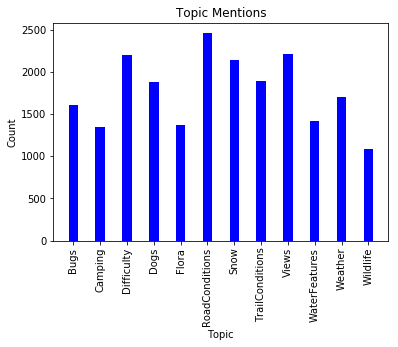

In [55]:
import matplotlib.pyplot as plt
import numpy as np

index = np.arange(12)
bar_width = 0.35
paragraph = topiccount['paragraph']
topics = topiccount['topic']

plt.bar(index, paragraph, bar_width,
                color='b')
plt.xlabel('Topic')
plt.xticks(index, (topics), rotation = 'vertical')
plt.ylabel('Count')
plt.title('Topic Mentions')
plt.show()

Make a plot of average sentiment per topic.

In [47]:
#make a plot of avg sentiment per topic
realtopics = ['TrailConditions', 'Dogs', 'Camping', 'Bugs', 'Wildlife', 'RoadConditions', 'WaterFeatures', 'Difficulty', 'Flora', 'Snow', 'Weather', 'Views']
avgsenttopic = fullwithsent[fullwithsent['topic'].isin(realtopics)].groupby(['topic'])['Sentiment'].mean()
avgsenttopic = pd.DataFrame(avgsenttopic)
avgsenttopic['topic'] = avgsenttopic.index
avgsenttopic

,Sentiment,topic
topic,,
Bugs,0.313612,Bugs
Camping,0.339905,Camping
Difficulty,0.421312,Difficulty
Dogs,0.531503,Dogs
Flora,0.379806,Flora
RoadConditions,0.293181,RoadConditions
Snow,0.404820,Snow
TrailConditions,0.259510,TrailConditions
Views,0.651790,Views


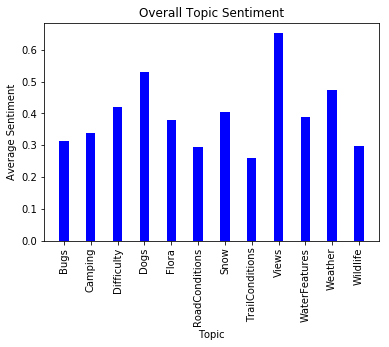

In [57]:
index = np.arange(12)
bar_width = 0.35
senti = avgsenttopic['Sentiment']
topics = avgsenttopic['topic']

plt.bar(index, senti, bar_width,
                color='b')
plt.xlabel('Topic')
plt.xticks(index, (topics), rotation = 'vertical')
plt.ylabel('Average Sentiment')
plt.title('Overall Topic Sentiment')
plt.show()

Write a function to return a plot per hike of the average sentiment

In [25]:
import matplotlib as mpl, matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from six.moves import cPickle as pickle


def reportsummary(hikename):
    with open('fullwithsent.pickle', 'rb') as file_handle:
        fullwithsent = pickle.load(file_handle)
    negtext = []
    negdate = []
    negurl = []
    postext = []
    posdate = []
    posurl = []
    
    if hikename in list(fullwithsent['hikename']):
        testdf = fullwithsent[fullwithsent['hikename'] == hikename]
        SummaryTable = pd.DataFrame(testdf.groupby('topic')['tripreporturl'].count())
        SummaryTable['mean'] = testdf.groupby('topic')['Sentiment'].mean()
        SummaryTable['topic'] = SummaryTable.index
        topicnames = ['TrailConditions', 'Dogs', 'Camping', 'Bugs', 'Wildlife', 'RoadCondtions', 'Difficulty', 'Flora', 'Snow', 'Weather']
        SummaryTable = SummaryTable[SummaryTable['topic'].isin(topicnames)]
        
        if len(SummaryTable) > 0:
            ax = sns.barplot(y = 'topic', x = 'tripreporturl', data = SummaryTable, 
                dodge = False, palette = mpl.cm.RdBu(SummaryTable['mean']/2+0.5), edgecolor=".2")
            ax.set(xlabel='Number of Reports', ylabel='Topic')
            plt.show()
    
        negperson = testdf[testdf['Sentiment'] == min(testdf['Sentiment'])]
        negtext.append([list(negperson['paragraph']), list(negperson['date']), list(negperson['tripreporturl'])])
    
        posperson = testdf[testdf['Sentiment'] == max(testdf['Sentiment'])]
        postext = postext.append(posperson['paragraph'])
        posdate.append(posperson['date'])
        posurl.append(posperson['tripreporturl'])
    
    return(postext)
    

In [27]:
reportsummary('Big Gulch')

In [181]:
#try first on a subset - Annette Lake
hikename = 'Big Gulch'
testdf = fullwithsent[fullwithsent['hikename'] == hikename]
testdf

,hikename,date,tripreporturl,report,paragraph_num,paragraph,topic,Sentiment
67,Big Gulch,Sep 18 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nNice little hike as long as you aren't bothe...,0,Nice little hike as long as you aren't bothere...,Tf,0.4127
371,Big Gulch,Sep 15 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nhiked today with my canine companion fairly...,0,hiked today with my canine companion fairly e...,Tl,0.9118
6307,Big Gulch,Aug 14 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nDidn’t want to go up in the mountains with t...,0,Didn’t want to go up in the mountains with thi...,Tf,0.8555


In [182]:
#for reports where the same topic is discussed twice, take the average sentiment
testdf['AvgSent'] = testdf.groupby(['hikename', 'date', 'tripreporturl', 'topic'], sort=False)["Sentiment"].transform('mean')
testdf

/home/alison/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,hikename,date,tripreporturl,report,paragraph_num,paragraph,topic,Sentiment,AvgSent
67,Big Gulch,Sep 18 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nNice little hike as long as you aren't bothe...,0,Nice little hike as long as you aren't bothere...,Tf,0.4127,0.4127
371,Big Gulch,Sep 15 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nhiked today with my canine companion fairly...,0,hiked today with my canine companion fairly e...,Tl,0.9118,0.9118
6307,Big Gulch,Aug 14 2018,https://www.wta.org/go-hiking/trip-reports/tri...,\nDidn’t want to go up in the mountains with t...,0,Didn’t want to go up in the mountains with thi...,Tf,0.8555,0.8555


In [183]:
#groupby topic and get report counts and avg sentiment
SummaryTable = pd.DataFrame(testdf.groupby('topic')['tripreporturl'].count())
SummaryTable['mean'] = testdf.groupby('topic')['Sentiment'].mean()
SummaryTable['topic'] = SummaryTable.index
topicnames = ['TrailConditions', 'Dogs', 'Camping', 'Bugs', 'Wildlife', 'RoadCondtions', 'Difficulty', 'Flora', 'Snow', 'Weather']
SummaryTable = SummaryTable[SummaryTable['topic'].isin(topicnames)]
#SummaryTable.columns = ['TrailConditions', 'Dog', 'Camping', 'Bugs', 'Wildlife', 'RoadCondtions', 'Difficulty', 'Flora', 'Snow', 'Weather']
SummaryTable

,tripreporturl,mean,topic
topic,,,


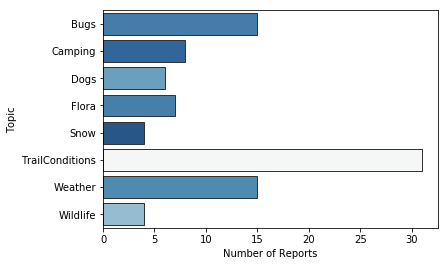

In [154]:
import matplotlib as mpl, matplotlib.pyplot as plt
import seaborn as sns

ax = sns.barplot(y = 'topic', x = 'tripreporturl', data = SummaryTable, 
            dodge = False, palette = mpl.cm.RdBu(SummaryTable['mean']/2+0.5), edgecolor=".2")
ax.set(xlabel='Number of Reports', ylabel='Topic')
plt.show()

Return the most negative and most positive paragraphs for the hike.

In [101]:
#Most negative paragraph
testdf = fullwithsent[fullwithsent['hikename'] == hikename]
negperson = testdf[testdf['Sentiment'] == min(testdf['Sentiment'])]
[list(negperson['paragraph']), list(negperson['date']), list(negperson['tripreporturl'])]

[['I may have lied a little to the boy about the difficulty and distance. This was his longest song at and there was some complaining.'],
 ['Jul 18 2018'],
 ['https://www.wta.org/go-hiking/trip-reports/trip_report.2018-07-18.6239897626']]

In [102]:
testdf = fullwithsent[fullwithsent['hikename'] == hikename]
posperson = testdf[testdf['Sentiment'] == max(testdf['Sentiment'])]
[list(posperson['paragraph']), list(posperson['date']), list(posperson['tripreporturl'])]

[["Lovely hike -- some potholes in road leading to trailhead but easy to either go around or slowly go over. my Subaru is fairly low clearance and I was fine. Restroom in parking lot is open. No traction or other gear necessary on trail but I was really glad to have brought my trekking poles. It gets to be a pretty good incline in the middle portion of the trail and as always they're helpful when coming back down. The trail is also cery rocky in places so it was nice to have the added stability. Wildflowers were starting to bloom saw a couple of woodpeckers and some chipmunks. Trail wasnt too populated but I went on a weekday so Im sure that has a lot to do with it. Of the people I ran into most of them had dogs - so definitely dog friendly :) Some snow in the higher portion of the trail but it's easily traversed. The lake itself was beautiful -- green-blue and clear. Still a bit of snow on the surrounding mountains. I didn't camp but there are clear sites. Bugs got to be somewhat of a

## LDA model validation

In [52]:
n_test = [13, 15, 20, 25, 30, 35, 40, 45]
list_loglike = []
for n in n_test:
    model = guidedlda.GuidedLDA(n_topics=n, n_iter=100, random_state=7, refresh=20)
    model.fit(X, seed_topics=seed_topics, seed_confidence=0.15)
    list_loglike.append(model.loglikelihood())
print(list_loglike)

INFO:guidedlda:n_documents: 30342
INFO:guidedlda:vocab_size: 7824
INFO:guidedlda:n_words: 848434
INFO:guidedlda:n_topics: 13
INFO:guidedlda:n_iter: 100
/home/alison/anaconda3/lib/python3.6/site-packages/guidedlda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):
INFO:guidedlda:<0> log likelihood: -9621900
INFO:guidedlda:<20> log likelihood: -6782606
INFO:guidedlda:<40> log likelihood: -6652616
INFO:guidedlda:<60> log likelihood: -6593139
INFO:guidedlda:<80> log likelihood: -6558858
INFO:guidedlda:<99> log likelihood: -6538576
INFO:guidedlda:n_documents: 30342
INFO:guidedlda:vocab_size: 7824
INFO:guidedlda:n_words: 848434
INFO:guidedlda:n_topics: 15
INFO:guidedlda:n_iter: 100
INFO:guidedlda:<0> log likelihood: -9893192
INFO:guidedlda:<20> log likelihood: -6815430
INFO:guidedlda:<40> log likeli

[-6538575.667337131, -6558821.239234519, -6593828.056545363, -6625821.5065366775, -6653360.3926324835, -6663483.706791669, -6681156.005733923, -6690483.014274531]


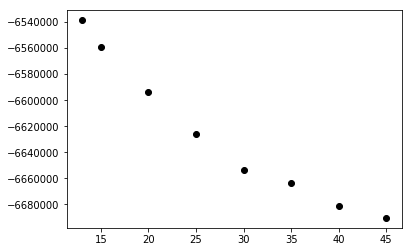

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
x = n_test
y = list_loglike

plt.plot(x, y, 'o', color='black');

## Gensim LDA without seed words

In [20]:
import re
report_text = prep['report']
#report_text['index'] = report_text.index
documents = report_text
documents = documents.str.replace('\"', '')
documents = documents.str.replace(',', '')
documents = documents.str.replace(r'\'', '')
documents = documents.str.replace('.', ' ')
documents = documents.str.replace('!', ' ')
documents = documents.str.replace('\n', '')
documents = documents.str.replace(r"(?<=\w)([A-Z])", r" \1")
documents = documents.str.replace(r'\xa0', ' ')

In [5]:
processed_docs = [preprocess(str(doc)) for doc in documents]

In [6]:
sentence_lengths = [len(d) for d in processed_docs]

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 5)) 
plt.xlabel('Trip Report Length')
plt.ylabel('Number of Trip Reports')
plt.hist(sentence_lengths, bins=range(min(sentence_lengths), 1000 + 25, 25))
plt.savefig('tripreportlength.png')
plt.show()

<Figure size 500x500 with 1 Axes>

In [8]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [9]:
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)

In [10]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [11]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
#from pprint import pprint
#for doc in corpus_tfidf:
#    pprint(doc)
#    break

In [12]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, passes=2, workers=2)

In [13]:
lda_model.num_terms

7646

In [25]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=3, id2word=dictionary, passes=2, workers=2)

In [ ]:
from gensim.test.utils import datapath
# Save model to disk.
temp_file = datapath("model")
lda_model_tfidf.save(temp_file)
# Load a potentially pretrained model from disk.
lda_model_tfidf = LdaMulticore.load(temp_file)

In [ ]:
lda_model.num_terms

model without TFIDF

In [14]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.023*"lake" + 0.012*"way" + 0.011*"mile" + 0.010*"road" + 0.010*"snow" + 0.009*"trailhead" + 0.009*"lot" + 0.008*"view" + 0.008*"day" + 0.007*"time"
Topic: 1 
Words: 0.016*"snow" + 0.015*"lot" + 0.012*"lake" + 0.009*"view" + 0.009*"there" + 0.008*"road" + 0.007*"parking" + 0.007*"way" + 0.007*"little" + 0.006*"time"
Topic: 2 
Words: 0.024*"lake" + 0.017*"snow" + 0.010*"view" + 0.009*"there" + 0.009*"way" + 0.008*"mile" + 0.007*"road" + 0.007*"lot" + 0.007*"creek" + 0.006*"right"
Topic: 3 
Words: 0.013*"mile" + 0.011*"day" + 0.009*"view" + 0.008*"way" + 0.008*"time" + 0.007*"there" + 0.007*"lot" + 0.007*"road" + 0.007*"this" + 0.007*"people"
Topic: 4 
Words: 0.017*"lake" + 0.010*"there" + 0.010*"way" + 0.010*"creek" + 0.008*"mile" + 0.007*"easy" + 0.006*"tree" + 0.006*"view" + 0.006*"time" + 0.006*"area"


model with TFIDF

In [16]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.005*"lake" + 0.005*"snow" + 0.003*"mile" + 0.003*"road" + 0.003*"lot" + 0.003*"there" + 0.003*"view" + 0.003*"little" + 0.003*"way" + 0.003*"pas"
Topic: 1 Word: 0.005*"snow" + 0.005*"lake" + 0.003*"great" + 0.002*"way" + 0.002*"lot" + 0.002*"view" + 0.002*"beautiful" + 0.002*"poo" + 0.002*"day" + 0.002*"family"
Topic: 2 Word: 0.004*"snow" + 0.004*"lake" + 0.003*"great" + 0.003*"road" + 0.003*"mile" + 0.003*"there" + 0.002*"easy" + 0.002*"way" + 0.002*"view" + 0.002*"lot"
Topic: 3 Word: 0.004*"snow" + 0.004*"lake" + 0.003*"beautiful" + 0.002*"day" + 0.002*"great" + 0.002*"lot" + 0.002*"people" + 0.002*"fall" + 0.002*"road" + 0.002*"nice"
Topic: 4 Word: 0.004*"snow" + 0.003*"lake" + 0.003*"beach" + 0.003*"road" + 0.003*"mile" + 0.003*"great" + 0.003*"lot" + 0.002*"nice" + 0.002*"way" + 0.002*"time"
Topic: 5 Word: 0.005*"snow" + 0.004*"lake" + 0.003*"road" + 0.003*"great" + 0.003*"lot" + 0.003*"mile" + 0.002*"way" + 0.002*"good" + 0.002*"view" + 0.002*"trailhead"
Topic: 6

View word to topic associations

In [15]:
topics_matrix = lda_model.show_topics(formatted=False,num_words=10)
topics_matrix

[(0,
  [('lake', 0.023058876),
   ('way', 0.012271662),
   ('mile', 0.011175451),
   ('road', 0.010413914),
   ('snow', 0.009741711),
   ('trailhead', 0.009288949),
   ('lot', 0.008609665),
   ('view', 0.0081749),
   ('day', 0.008151542),
   ('time', 0.0070727593)]),
 (1,
  [('snow', 0.015716493),
   ('lot', 0.015242997),
   ('lake', 0.012487891),
   ('view', 0.009317267),
   ('there', 0.008718313),
   ('road', 0.007769318),
   ('parking', 0.0074326596),
   ('way', 0.006750037),
   ('little', 0.006620509),
   ('time', 0.0064125326)]),
 (2,
  [('lake', 0.024311626),
   ('snow', 0.016719708),
   ('view', 0.01003427),
   ('there', 0.0094285505),
   ('way', 0.009056596),
   ('mile', 0.008463965),
   ('road', 0.007183363),
   ('lot', 0.006986289),
   ('creek', 0.006832218),
   ('right', 0.005885865)]),
 (3,
  [('mile', 0.012922089),
   ('day', 0.0107639115),
   ('view', 0.008534419),
   ('way', 0.008357082),
   ('time', 0.008264242),
   ('there', 0.007351246),
   ('lot', 0.0073172217),
   (

Not getting great results for topics.  Try by paragraph.

In [34]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=15, id2word=dictionary, passes=2, workers=2)

In [55]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [66]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=20, id2word=dictionary, passes=2, workers=2)

Model without TFIDF

In [35]:
topics_matrix = lda_model.show_topics(formatted=False,num_words=10)
topics_matrix

[(3,
  [('lot', 0.051184867),
   ('parking', 0.042519465),
   ('car', 0.03639933),
   ('trailhead', 0.022305464),
   ('arrived', 0.017622823),
   ('got', 0.016094046),
   ('road', 0.014801354),
   ('the', 0.012655974),
   ('lake', 0.01153401),
   ('trail', 0.011263599)]),
 (4,
  [('the', 0.04287285),
   ('hike', 0.015644837),
   ('bug', 0.015337156),
   ('trail', 0.011891525),
   ('day', 0.011713547),
   ('trailhead', 0.010623093),
   ('lake', 0.009840754),
   ('mile', 0.0080453),
   ('little', 0.007776318),
   ('pretty', 0.0074258302)]),
 (9,
  [('trail', 0.056839075),
   ('lake', 0.019536443),
   ('the', 0.01714548),
   ('there', 0.011620179),
   ('tree', 0.009347106),
   ('mile', 0.008820561),
   ('section', 0.0071424497),
   ('steep', 0.006753794),
   ('right', 0.00663307),
   ('way', 0.006595038)]),
 (6,
  [('road', 0.057950847),
   ('trailhead', 0.021931427),
   ('mile', 0.02074534),
   ('the', 0.018743431),
   ('car', 0.01567449),
   ('vehicle', 0.011900314),
   ('there', 0.0101

Model with TFIDF

In [69]:
topics_matrix = lda_model_tfidf.show_topics(formatted=False,num_words=10)
topics_matrix

[(19,
  [('navaho', 0.0082890615),
   ('what', 0.007642833),
   ('fall', 0.0062504923),
   ('seattlestorys', 0.0056777042),
   ('fireplace', 0.0049029877),
   ('harness', 0.004817667),
   ('lake', 0.0043053823),
   ('greider', 0.004155357),
   ('trail', 0.004133048),
   ('pic', 0.003983747)]),
 (16,
  [('trail', 0.0075754495),
   ('snow', 0.005317004),
   ('the', 0.0052894345),
   ('hike', 0.005065641),
   ('lake', 0.004914592),
   ('view', 0.0042776596),
   ('mile', 0.003826063),
   ('there', 0.0037299977),
   ('tree', 0.003569388),
   ('rock', 0.0031967994)]),
 (17,
  [('snow', 0.009863831),
   ('lake', 0.007454781),
   ('day', 0.006905237),
   ('trail', 0.0068256077),
   ('hike', 0.006697806),
   ('great', 0.0064934897),
   ('the', 0.005578022),
   ('ice', 0.005203091),
   ('pas', 0.0047877883),
   ('road', 0.004357241)]),
 (15,
  [('snow', 0.008881227),
   ('trail', 0.008325426),
   ('lake', 0.007029241),
   ('the', 0.006314153),
   ('view', 0.005938113),
   ('hike', 0.0054825433),

In [78]:
n_terms = len(list(dictionary.values()))
n_terms

7824

In [42]:
import numpy as np
import guidedlda

vocab = list(dictionary.values())

print(X.shape)

print(X.sum())

model = guidedlda.GuidedLDA(n_topics=5, n_iter=100, random_state=7, refresh=20)
model.fit(X)

topic_word = model.topic_word_
n_top_words = 20
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

INFO:guidedlda:n_documents: 30342
INFO:guidedlda:vocab_size: 7824
INFO:guidedlda:n_words: 848434
INFO:guidedlda:n_topics: 5
INFO:guidedlda:n_iter: 100


(30342, 7824)
848434


/home/alison/anaconda3/lib/python3.6/site-packages/guidedlda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):
INFO:guidedlda:<0> log likelihood: -8042067
INFO:guidedlda:<20> log likelihood: -6612287
INFO:guidedlda:<40> log likelihood: -6481634
INFO:guidedlda:<60> log likelihood: -6430742
INFO:guidedlda:<80> log likelihood: -6405229
INFO:guidedlda:<99> log likelihood: -6389548


Topic 0: trail lake the snow water way mile there hike creek camp day pas time rock view good crossing tree lot
Topic 1: trail the lake view mile ridge hike snow peak way summit mountain day pas there steep right time great creek
Topic 2: lake trail hike the day bug lot view way time got great there people beautiful mile saw parking hour water
Topic 3: trail hike the lot parking lake road day way trailhead car people great time mile view there got saw beautiful
Topic 4: trail the road mile lake there hike way lot trailhead creek tree right area easy rock good parking left little


In [35]:
list_loglike
perplexity = exp(-loglike/n_terms)

[-6538575.667337131,
 -6558821.239234519,
 -6593828.056545363,
 -6625821.5065366775,
 -6653360.3926324835,
 -6663483.706791669]

In [81]:
n_top_words = 15
topic_word = model.topic_word_
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: trail the creek mile river road bridge work pas tree section trailhead good condition fork
Topic 1: dog trail hike people hiker day time year great kid lot leash hiking way like
Topic 2: camp lake night campsite water site day tent the pas spot there creek camping set
Topic 3: bug lake mosquito the spray bad fly hike got bite time bring trail lot water
Topic 4: bear saw trail goat lake deer lot marmot bird wildlife way day mountain hiker black
Topic 5: trail hike the way view time great lake day people lot easy good got hour
Topic 6: road trailhead parking the car lot mile vehicle pothole trail there drive arrived rough got
Topic 7: lake trail the creek water mile there pas way crossing campsite stream right junction camp
Topic 8: trail ridge summit the mile peak view steep climb foot mountain gain right rock route
Topic 9: the flower trail wildflower berry there meadow lot view bloom ripe peak blooming huckleberry lily
Topic 10: hike trail the lake kid great little year day o